<a href="https://colab.research.google.com/github/harsh-sengar/Cyber-Security-CS631/blob/main/cs631_cyber_security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection for Cyber Physical Systems using Machine Learning

### Goal
In this notebook, you will be experimenting with several unsupervised learning models for clustering data.

### Objectives
1. Developing better anaomaly detection algorithm to detect under attack senarios.


In [469]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1049]:
cd /content/gdrive/MyDrive/IIT Kanpur/CS631/Project/data

/content/gdrive/MyDrive/IIT Kanpur/CS631/Project/data


In [1050]:
ls

1SA1xmv9_hundred_data_1.csv      4DA1xmv10_359_data_1.csv
2SA2xmv6_twentyeight_data_1.csv  5DA2xmeas7_zero_data_1.csv
3SA3xmeas10_001_data_1.csv


In [1051]:
from numpy import unique
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
from sklearn.cluster import KMeans

import pandas as pd
from scipy.linalg import hankel, eigh
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import mixture
from sklearn.metrics import accuracy_score
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#Data Preprocessing

In [1052]:
X = np.asarray(pd.read_csv('4DA1xmv10_359_data_1.csv', usecols=[14], header=None))

In [1053]:
X_data = np.asarray(pd.read_csv('4DA1xmv10_359_data_1.csv', header=None))

In [1054]:
df = pd.read_csv('4DA1xmv10_359_data_1.csv',  header=None)

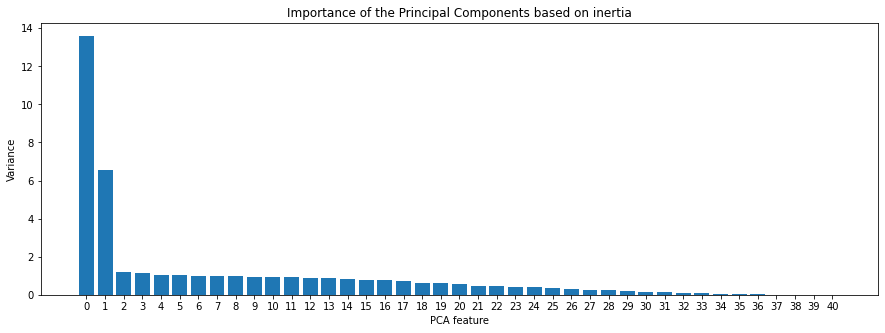

In [1055]:
# Extract the names of the numerical columns
names=df.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [1056]:
# Calculate PCA with 3 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [1057]:
X_train, X_test = X_data[:3200,:], X_data[3200:,:]

In [1058]:
X_ran = X_data[np.random.randint(X_data.shape[0], size=800), :]

In [1059]:
X_train_full = X_data[:4000,:]

In [1060]:
X_train = pd.DataFrame(data = X_train)
X_test = pd.DataFrame(data = X_test)

In [1061]:
y2 = np.zeros(800)
y1 = np.ones(801)
y_ground = np.append(y1,y2)

In [1062]:
yy = y2

In [1063]:
y_ground

array([1., 1., 1., ..., 0., 0., 0.])

Elbow Method


In [1064]:
wcss = [] 
for i in range(1, 11): 
    kmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_full) 
    wcss.append(kmeans.inertia_)

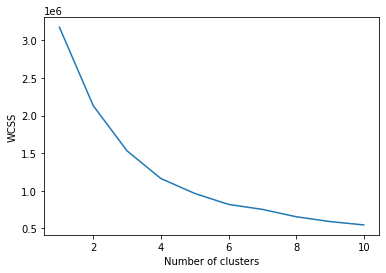

In [1065]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [1066]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_full) 
    wcss.append(kmeans.inertia_)

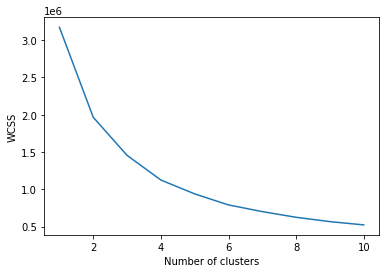

In [1067]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

 Akaike information criterion (AIC) or the Bayesian information criterion (BIC)

In [1068]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_data)
          for n in n_components]


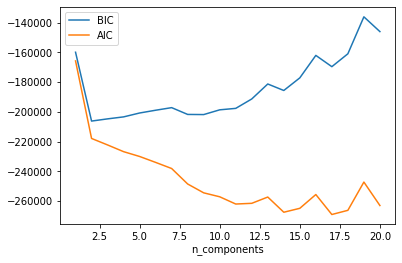

In [1069]:
plt.plot(n_components, [m.bic(X_data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [1070]:
def density_data(X_train, model):
  model.fit(X_train)
  centers = np.empty(shape=(model.n_components, X_train.shape[1]))
  for i in range(model.n_components):
      density = scipy.stats.multivariate_normal(cov=model.covariances_[i], mean=model.means_[i]).logpdf(X_train)
      print(density, X_train[np.argmax(density)])
      

In [1071]:
def distance_(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_
        dis = 10000
        for j in range(0, len(model.cluster_centers_)):
            dis = min(dis, np.linalg.norm(Xa-Xb))
        distance.append(dis)
    return pd.Series(distance, index=data.index)

#K-Means Clustering

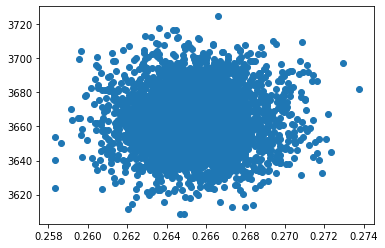

In [1072]:
# model = MiniBatchKMeans(n_clusters=4)
model = KMeans(n_clusters=1, random_state=42)
model.fit(X_train.values)
labels = model.predict(X_train.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
# clusters = np.asarray((unique_elements, counts_elements))
clusters = unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(labels == cluster)
	# create scatter of these samples
	plt.scatter(X_data[row_ix, 0], X_data[row_ix, 1])
# show the plot
plt.show()

In [1073]:
distance = distance_(X_train, model)
outliers_fraction = 0.20

# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

In [1074]:
threshold

35.58592934561788

In [1075]:
distance_test = distance_(X_test, model)

In [1076]:
y_test = (distance_test <= threshold).astype(int)

In [1077]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)

In [1078]:
unique_elements, counts_elements

(array([0, 1]), array([ 469, 1132]))

In [1079]:
accuracy_score(y_ground, y_test)

0.5858838226108682

In [1080]:
accuracy_score(y1, y_test[800:])

0.6217228464419475

# MiniBatchKMeans with Reduces Dimentionality

In [1081]:
# Calculate PCA with 3 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf_train = pd.DataFrame(data = principalComponents)

In [1082]:
# Calculate PCA with 3 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test)
principalDf_test = pd.DataFrame(data = principalComponents)

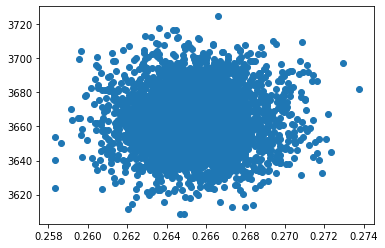

In [1083]:
model = MiniBatchKMeans(n_clusters=1)
# model = KMeans(n_clusters=4, random_state=42)
model.fit(principalDf_train.values)
labels = model.predict(principalDf_train.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
# clusters = np.asarray((unique_elements, counts_elements))
clusters = unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(labels == cluster)
	# create scatter of these samples
	plt.scatter(X_data[row_ix, 0], X_data[row_ix, 1])
# show the plot
plt.show()

In [1084]:
distance = distance_(principalDf_train, model)
outliers_fraction = 0.25

# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

In [1085]:
threshold


33.06412213935833

In [1086]:
distance_test = distance_(principalDf_test, model)

In [1087]:
y_test = (distance_test <= threshold).astype(int)

In [1088]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)

In [1089]:
unique_elements, counts_elements

(array([0, 1]), array([ 460, 1141]))

In [1090]:
accuracy_score(y_ground, y_test)

0.5402873204247346

In [1091]:
accuracy_score(y1, y_test[800:])

0.6729088639200999

### t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


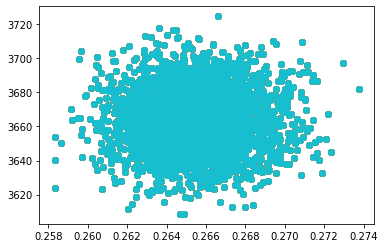

In [1092]:
from sklearn.manifold import TSNE
from scipy.stats import mode

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
data_proj = tsne.fit_transform(X_train)
data_proj_test = tsne.fit_transform(X_test)
# Compute the clusters
kmeans = KMeans(n_clusters=1, random_state=0)
clusters = kmeans.fit_predict(data_proj)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(labels == cluster)
	# create scatter of these samples
	plt.scatter(X_data[row_ix, 0], X_data[row_ix, 1])
# show the plot
plt.show()

# Compute the accuracy
# accuracy_score(y_ground, labels)

In [1093]:
data_proj = pd.DataFrame(data = data_proj)
data_proj_test = pd.DataFrame(data = data_proj_test)

In [1094]:
labels = kmeans.predict(data_proj_test)

In [1095]:
distance = distance_(data_proj, model)
outliers_fraction = 0.6

# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

In [1096]:
threshold


37.57039661422777

In [1097]:
distance_test = distance_(data_proj_test, model)

In [1098]:
y_test = (distance_test <= threshold).astype(int)

In [1099]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)

In [1100]:
unique_elements, counts_elements

(array([0, 1]), array([ 568, 1033]))

In [1101]:
accuracy_score(y_ground, y_test)

0.5840099937539038

In [1102]:
accuracy_score(y1, y_test[800:])

0.5617977528089888

#Gaussian Mixture Model

In [1147]:
model_GMM = GaussianMixture(n_components=2)

model_GMM.fit(X_data)

# predict probabilities
yhat = model_GMM.predict(X_test[800:])
# retrieve unique clusters 
clusters = unique(yhat)
# create scatter plot for samples from each cluster
# for cluster in clusters:
# 	# get row indexes for samples with this cluster
# 	row_ix = where(yhat == cluster)
# 	# create scatter of these samples
# 	plt.scatter(X_data[row_ix, 0], X_data[row_ix, 1])
# # show the plot
# plt.show()

In [1148]:
model_GMM = GaussianMixture(n_components=2)
model_GMM.fit(X_data)
# predict probabilities
lr_probs = model_GMM.predict_proba(X_test)

In [1149]:
X_data_new = (pd.read_csv('4DA1xmv10_359_data_1.csv', header=None))

In [1150]:
X_test_new = X_data_new[4000:]

In [1151]:
lr_probs = lr_probs[:,0]

In [1152]:
labels = (lr_probs <= 0.5).astype(int)

In [1153]:
accuracy_score(y_ground, labels)

0.933791380387258

In [1154]:
lr_probs_new = model_GMM.predict_proba(X_test_new)

In [1155]:
lr_probs_new = lr_probs_new[:, 0]

In [1156]:
labels = (lr_probs_new <= 0.5).astype(int)

In [1157]:
accuracy_score(y_ground[800:], labels)

0.867665418227216

No handles with labels found to put in legend.


: ROC AUC=0.500
: ROC AUC=0.031


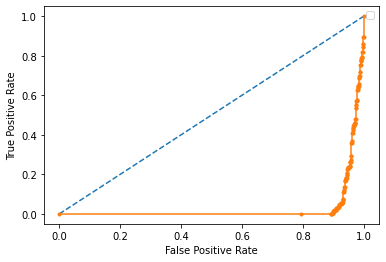

In [962]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range((1601))]
# fit a model
model_GMM = GaussianMixture(n_components=2)

model_GMM.fit(X_data)

# predict probabilities
lr_probs = model_GMM.predict_proba(X_test)
# print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]
# print(lr_probs)
# calculate scores
ns_auc = roc_auc_score(y_ground, ns_probs)
lr_auc = roc_auc_score(y_ground, lr_probs)
# summarize scores
print(': ROC AUC=%.3f' % (ns_auc))
print(': ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_ground, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_ground, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#PASAD


In [ ]:
X_train_ = X[:500] # For training 
X_val = X[250:4000] # For Validation and Thresold calculation
X_test = X[3750:] # For detection

In [ ]:
N = len(X_train)
L = N // 2
X_train = hankel(X_train_[:L],X_train_[L-1:]) # Creating trajectory matrix

Text(0.5, 0, 'Cardinal Number of Eigen value ->')

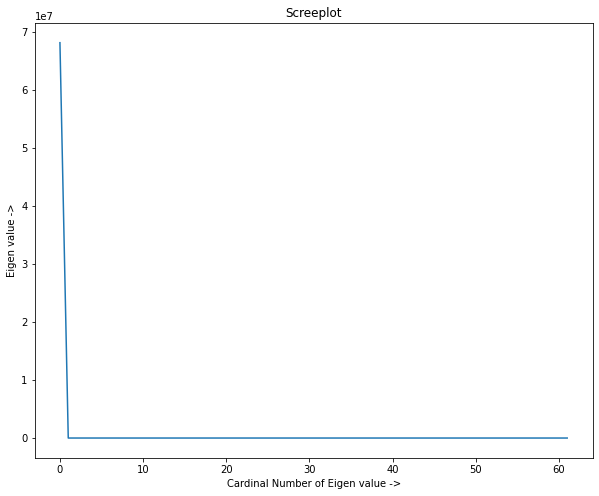

In [ ]:
eigenValues, eigenVectors = eigh(np.matmul(X_train, X_train.T))
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
# Sree plot
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(eigenValues)
ax.set_title("Screeplot")
ax.set_ylabel("Eigen value ->")
ax.set_xlabel("Cardinal Number of Eigen value ->")

In [ ]:
# From the above scree plot, it is seen that the first eigen value is more 
# significant and the other eigen values are close to zero. Thus we choose r as 1
# and then we compute the U for projection and centroid in the signal subspace
r = 1
# Extracted Training signals
U, Sigma, V = np.linalg.svd(X_train)
V = V.T
# d = np.linalg.matrix_rank(X_train)
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,r)] )
X_train_extracted = X_elem.sum(axis=0)
X_train_extracted_data = np.asarray(list(X_train_extracted[:,0]) + list(X_train_extracted[:,-1]))

U = eigenVectors[:,:r] # r as statistical dimension
UT = U.T
pX = np.matmul(UT,X_train_extracted)
centroid = np.mean(pX, axis=1)
centroid = centroid[:,np.newaxis]

In [ ]:
# Calculating the departure threshold in signal subspace using centroid and UT

#For training phase
Xtrg = hankel(X_train_[:L], X_train_[L-1:])
pXtrg = np.matmul(UT,Xtrg)
dtrg_matrix = centroid - pXtrg
dtrg_scores = np.linalg.norm(dtrg_matrix, axis=0, ord=2)

# For Validation phase and threshold calculation
Xt = hankel(X_val[:L],X_val[L-1:])
pXt = np.matmul(UT,Xt)
dt_matrix = centroid - pXt
dt_scores = np.linalg.norm(dt_matrix, axis=0, ord=2)
# d_scores = np.asarray([np.matmul(d_matrix[:,i].T, d_matrix[:,i]) for i in range(d_matrix.shape[1])])
dt_theta = np.max(dt_scores)
dt_theta

5.0921005847550305

In [ ]:
Xj = hankel(X_test[:L],X_test[L-1:])

In [ ]:
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
# dj_scores = [np.matmul(dj_matrix[:,i].T, dj_matrix[:,i]) for i in range(dj_matrix.shape[1])]
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

117.31233281822881

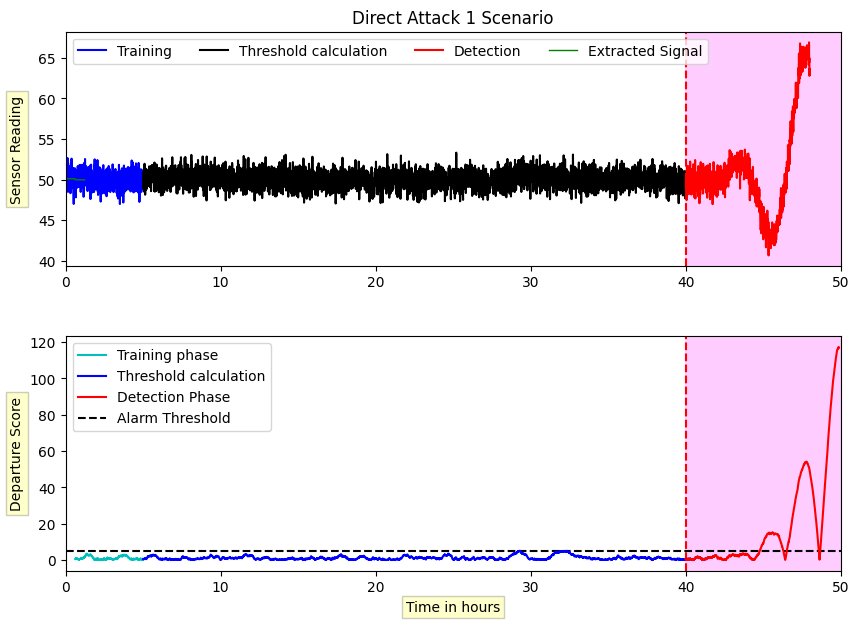

In [ ]:
#Testing Plots and Subplots
style.use('default')
box = dict(facecolor='yellow', pad=3, alpha=0.2)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_xlim(0,5000)
ax2.set_xlim(0,5000)
# ax2.set_ylim(0,10)

plt.subplots_adjust(hspace =0.3)

xlables = list(range(0,5000,10)) # for both plots

# Plotting signal reading
xmeasx_1 = list(range(501))
xmeasx_2 = list(range(501, 4001))
xmeasx_3 = list(range(4001,len(X)))
ax1.plot(xmeasx_1, X[:501] ,'b', label='Training') # Plot of Training Data
ax1.plot(xmeasx_2, X[501:4001] ,'k', label='Threshold calculation') # Plot of Threshold Determination Data
ax1.plot(xmeasx_3, X[4001:] ,'r', label='Detection') # Plot of Detection Phase
ax1.plot(X_train_extracted_data, 'g', linewidth=1, label='Extracted Signal' )
ax1.set_xticklabels(xlables)
ax1.title.set_text('Direct Attack 1 Scenario')
ax1.set_ylabel('Sensor Reading', bbox=box)
ylim = list(ax1.get_ylim())
ax1.vlines(4000,ylim[0],ylim[1],linestyles='dashed', colors='r')
X = np.array([[4000,5000],[4000,5000]])
Y = np.array([[ylim[0],ylim[0]],[ylim[1],ylim[1]]])
C = np.array([[4000,4500]])
ax1.pcolormesh(X, Y, C, cmap='cool_r', alpha=0.2)
ax1.legend(loc='best', ncol=4)


# Plotting departure score
dy = dtrg_scores
dx = list(range(L,len(dy)+L))
ax2.plot(dx, dy, 'c', label='Training phase')
dy = dt_scores
dx = list(range(500,len(dy)+500))
ax2.plot(dx, dy, 'b', label='Threshold calculation')
dy = dj_scores
dx = list(range(4000,len(dy)+4000))
ax2.plot(dx, dy, 'r', label='Detection Phase')
ylim = list(ax2.get_ylim())
ax2.vlines(4000,ylim[0],ylim[1],linestyles='dashed', colors='r')
ax2.set_xticklabels(xlables)
ax2.hlines(dt_theta,0,5000,linestyles='dashed', label='Alarm Threshold')
ax2.set_xlabel('Time in hours', bbox=box)
ax2.set_ylabel('Departure Score', bbox=box)

X = np.array([[4000,5000],[4000,5000]])
Y = np.array([[ylim[0],ylim[0]],[ylim[1],ylim[1]]])
C = np.array([[4000,4500]])
ax2.pcolormesh(X, Y, C, cmap='cool_r', alpha=0.2)
ax2.legend(loc='upper left')
fig.align_ylabels([ax1,ax2])

In [ ]:
import numpy as np
from numpy import linalg
from scipy.linalg import hankel
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys

arguments=sys.argv[2:]
count=len(arguments)
r=1

def PASAD_TRAIN(train,n,l):
	X=hankel(train[0:l],train[l:n])
	u,s,vt = linalg.svd(X)
	U = u[:,:r]
	return U.T


data=genfromtxt(sys.argv[1], delimiter=",")
train_1=data[:500,:]
train_2=data[500:4000,:]
test=data[4000:4800,:]
	
L=250
N1=train_1.shape[0]
N2=train_2.shape[0]
K=N2-L+1
S=train_1.shape[1]

for i in arguments:
	i=int(i)
	print("Starting " + str(i) + " Sensor")
	UT = PASAD_TRAIN(train_1[:,i-1],N1,L)
	print("Pasad Complete")					
	s=np.zeros(L)
	s=s.T
	for j in range(0,K-1):
		H=hankel(train_2[0:L,i-1],train_2[L:N2,i-1])
		H.reshape((250,H.shape[1]))
		xi=H[:,j]
		s=s+xi

	c=s/K
	cc=UT.dot(c)						
	print("Centroid found")	
	d=np.zeros(K)
	
	for j in range(0,K-1):	
		d[j]=np.linalg.norm(cc-UT.dot(H[:,j]))
	
	dmax=np.amax(d)						
	print("Departure Calculated: " + str(dmax))
	N=N1+N2
	x=train_2[N2-L:N2,i-1]
	Tsize=test.shape[0]
	D=np.zeros(Tsize)
	for j in range(N+1,4800):
		#print(x.shape)
		x=x[1:]	
		#print(x.shape)
		x=np.insert(x,L-2,test[j-N,i-1])
		x=x.T
		y= cc-UT.dot(x)
		D[j-N-1]=(y.T).dot(y)
		
	Dmax=np.amax(D)
		
	if (Dmax> dmax):
		print("Dmax: " +str(Dmax))
	else:
		print("No Alarm! Dmax: "+str(Dmax))



	dd=np.insert(d,K,D)
	
	plt.subplot(2,1,1)
	plt.ylabel('XMEAS('+str(i)+')')
	plt.plot(np.arange(0,4801,1),data[:,i-1])

	plt.subplot(2,1,2)
	plt.xlabel('Time')
	plt.ylabel('Departure Score')
	plt.plot(np.arange(750,4801,1),dd)
	plt.plot(np.arange(750,4801,1),np.repeat(dmax,4051))
	prefix=sys.argv[1]		
	plt.savefig(prefix[5:8]+'_sensor_'+str(i)+'.pdf')
	plt.close()
			
	
